In [37]:
import numpy as np
import matplotlib.pyplot as pl
from tools.plot import imshow
from matplotlib.colors import ListedColormap,

In [62]:
def gaussian_kernel(theta, sigma, normed=False):
    dim = len(theta)
    sigma_inv = np.linalg.inv(sigma)
    pref = 1 if not normed else (2 * np.pi)**(-dim / 2) / np.linalg.det(sigma)**.5
    
    def kernel(x, y):
        vec = np.array([x, y]) - theta
        return pref * np.exp(- vec @ sigma_inv @ vec / 2)
    
    return np.frompyfunc(kernel, 2, 1)

In [63]:
def rotmat(phi):
    return np.array([[np.cos(phi), np.sin(-phi)], [np.sin(phi), np.cos(phi)]])

In [64]:
theta = np.array([0, 0])
sigma = np.array(rotmat(-np.pi / 3) @ np.diag([2, 1]) @ rotmat(np.pi / 3))
f = gaussian_kernel(theta, sigma)

In [73]:
XRANGE = (-4, 4)
YRANGE = (-4, 4)
RESOLUTION = (100, 100)

xx, yy = np.meshgrid(np.linspace(*XRANGE, RESOLUTION[0]), np.linspace(*YRANGE, RESOLUTION[1]))
density = f(xx.ravel(), yy.ravel()).astype(np.float_).reshape(xx.shape)

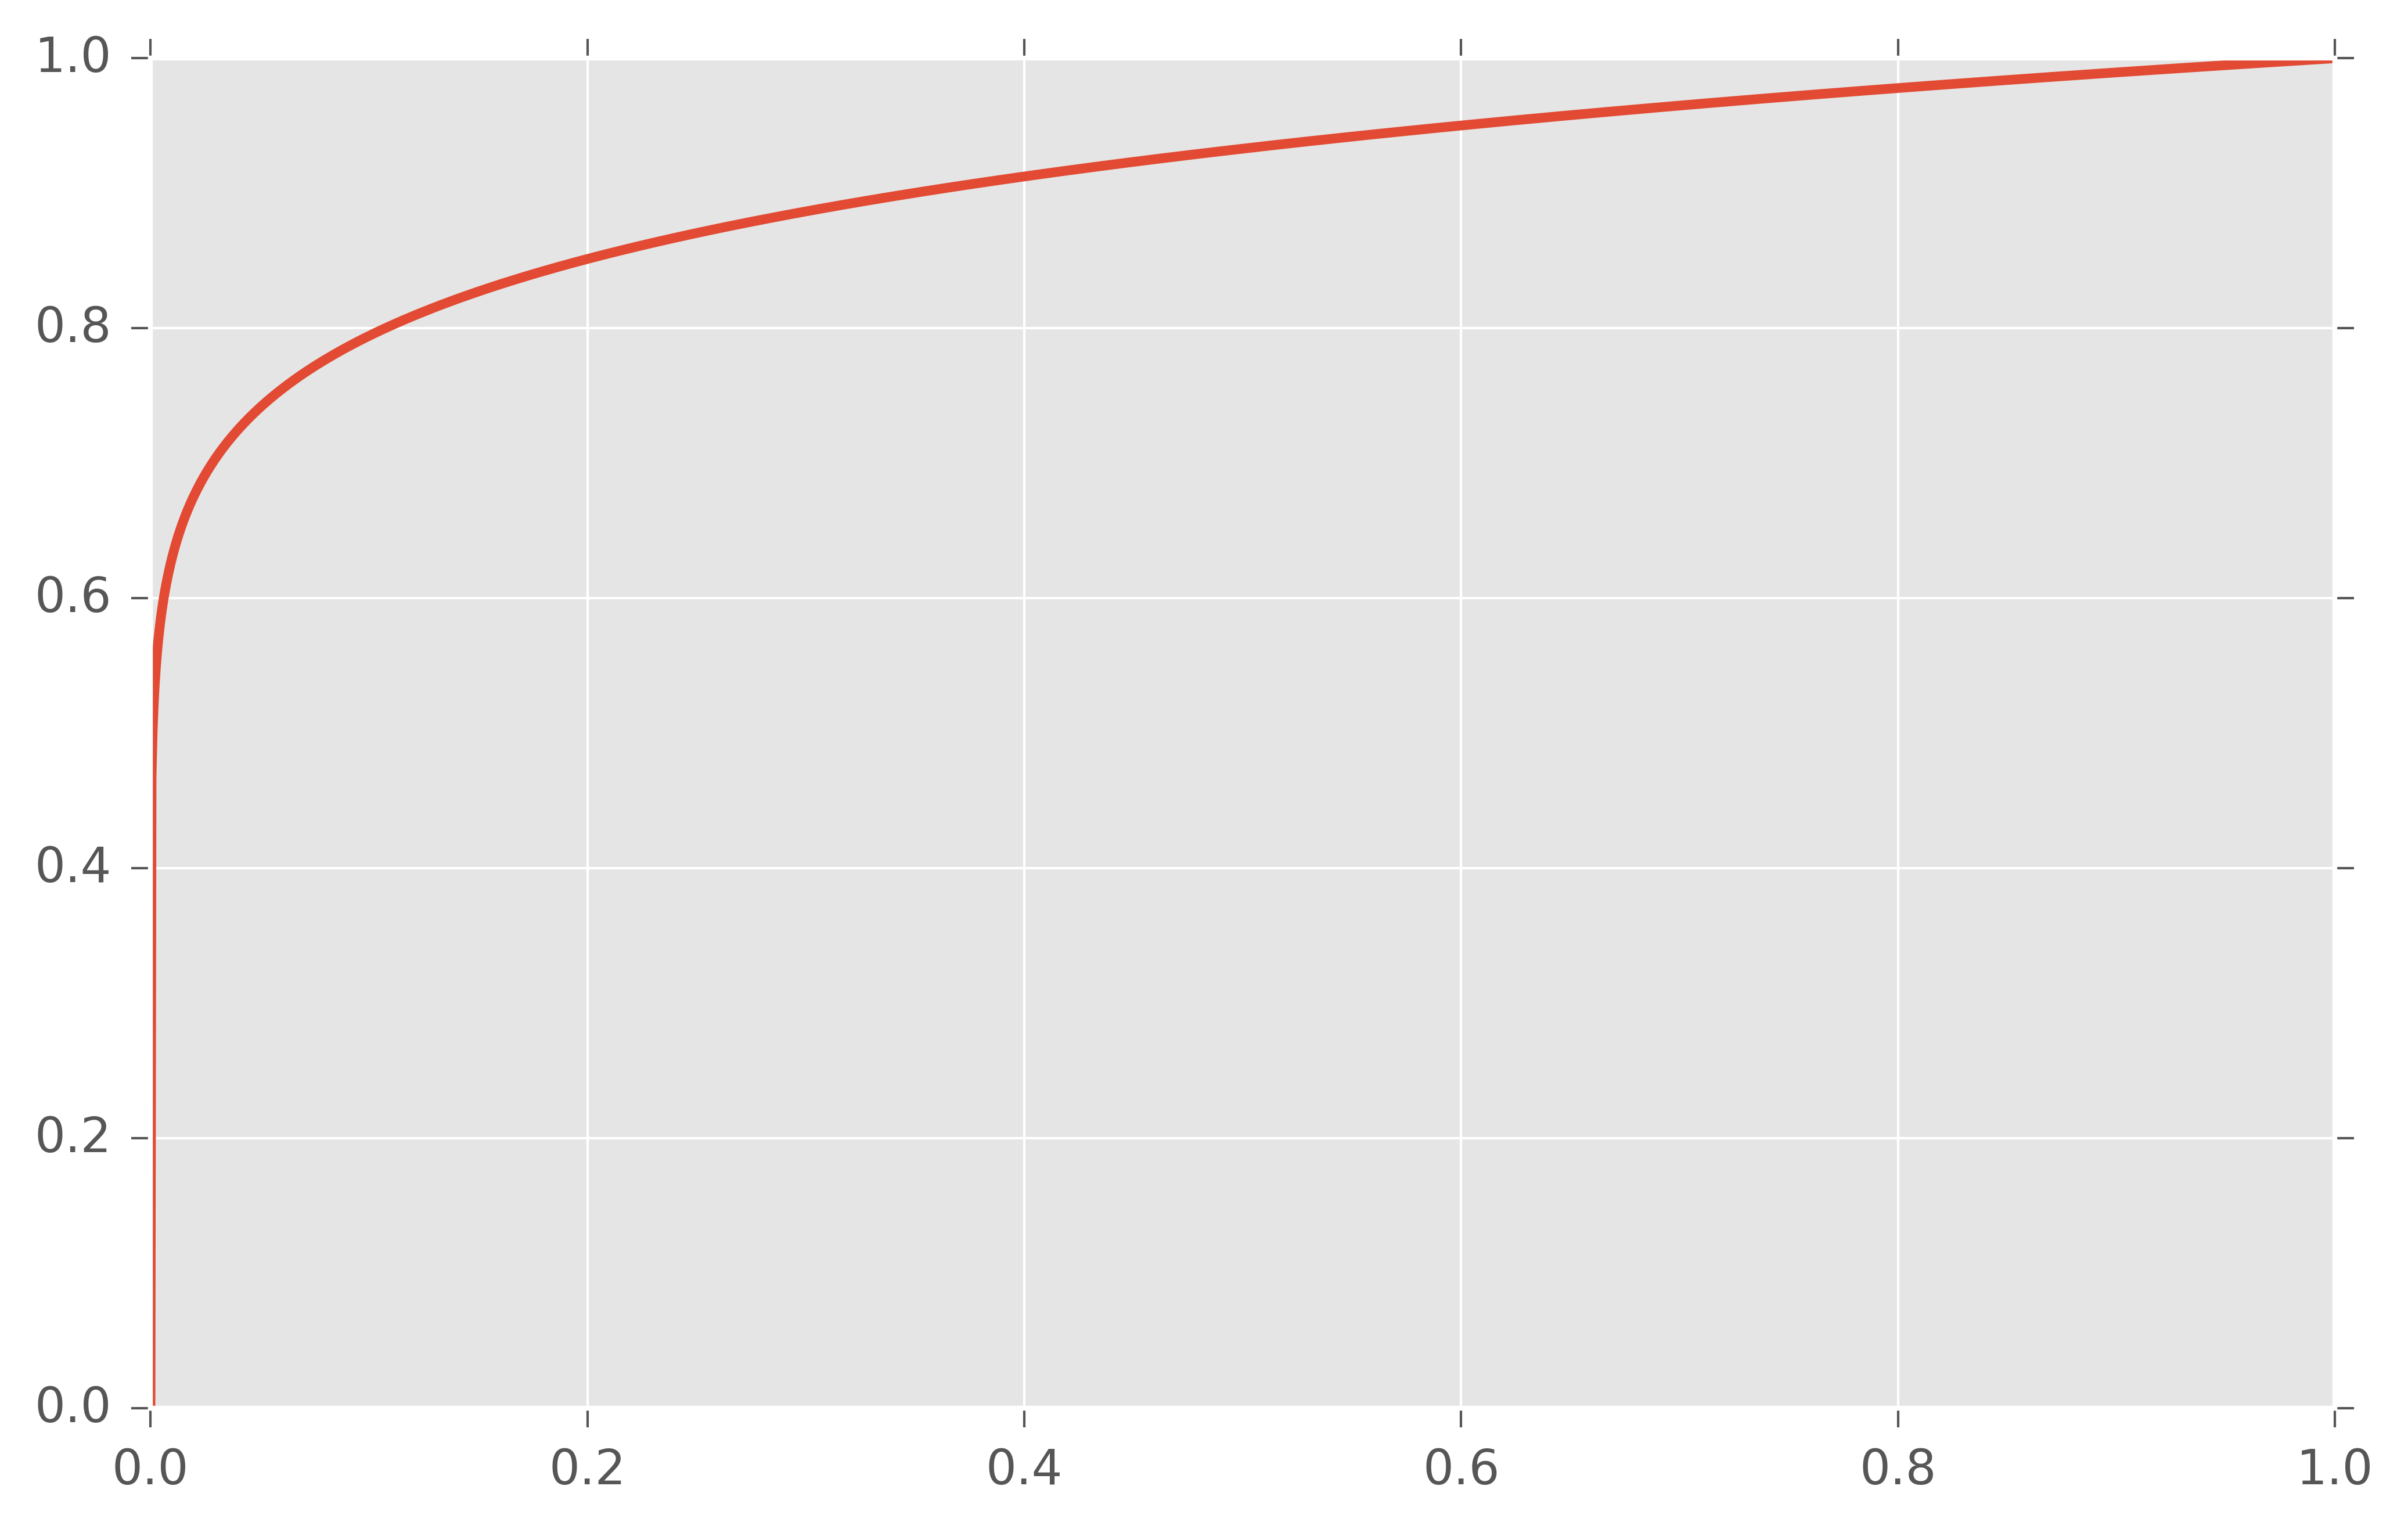

In [85]:
x = np.linspace(0, 1, 2000)
pl.plot(x, x**(1/10))

In [89]:
pl.contour?

In [ ]:
pl.cont

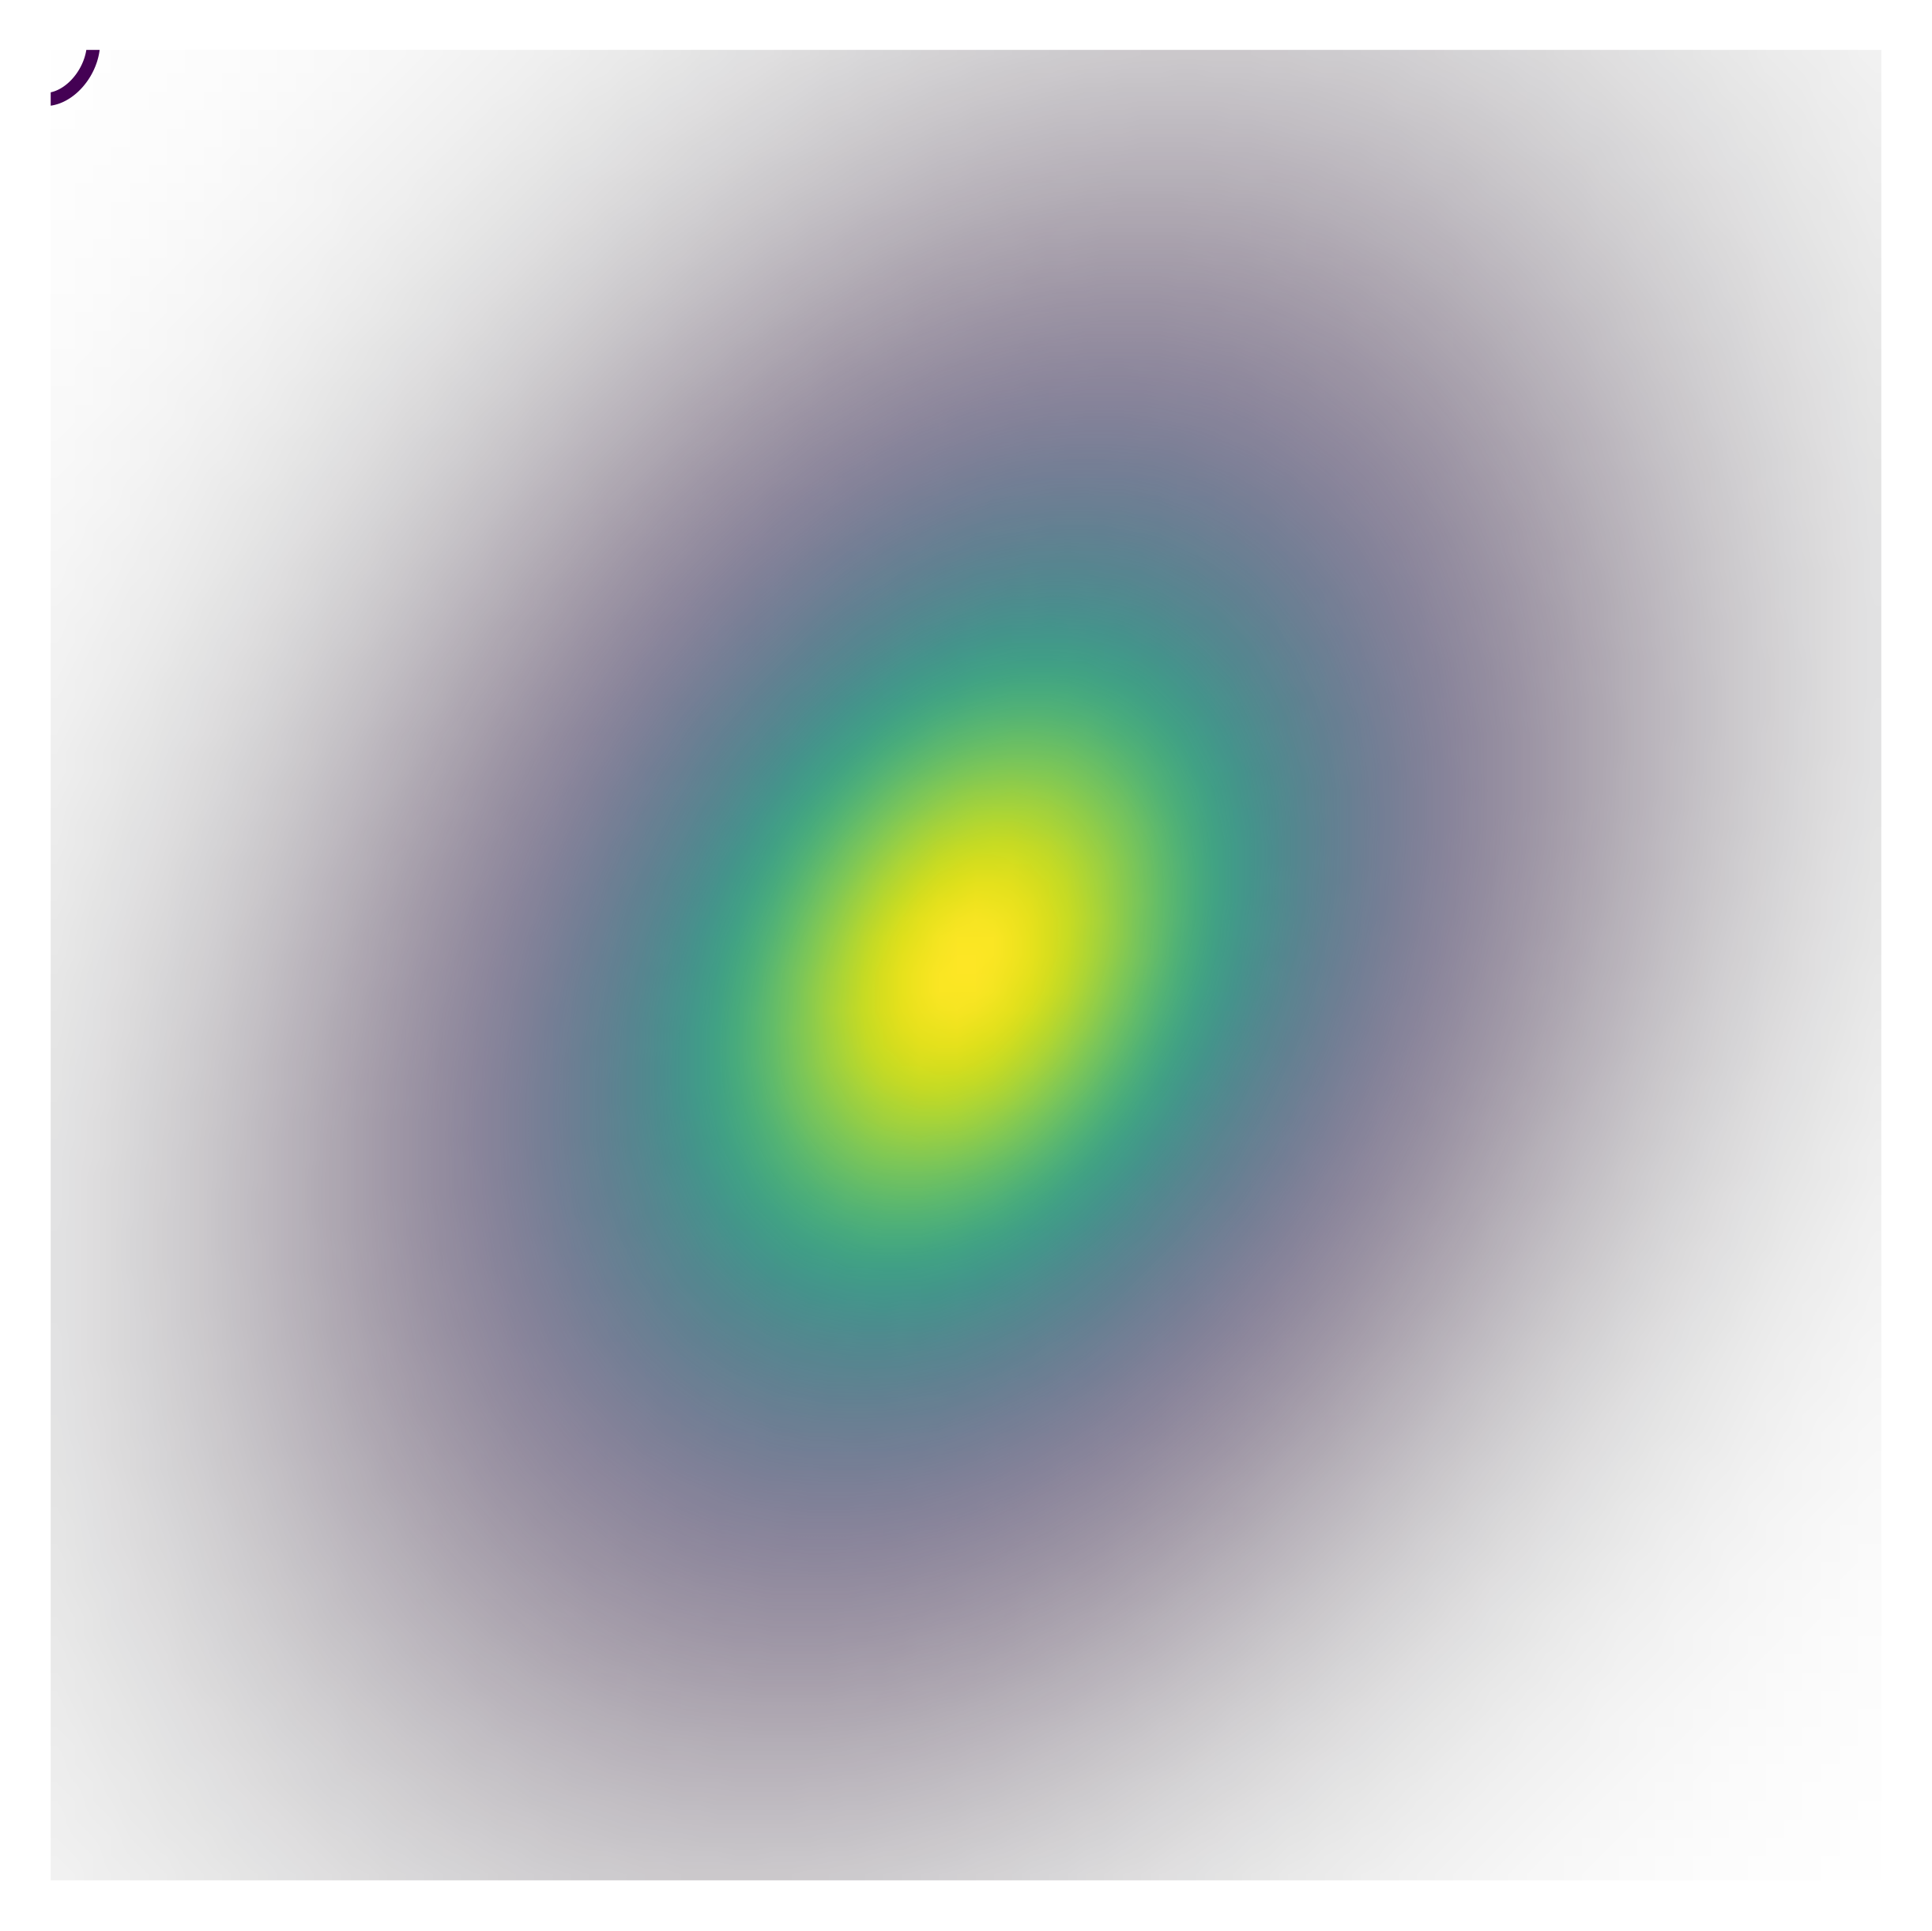

In [91]:
ax1 = pl.subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
density_rgb = cmap(density)
density_rgb[:, :, -1] = density**(1/3)
ax1.set_axis_bgcolor('white')
ax1.contour(xx, yy, density, [.2])
imshow(density_rgb)

In [ ]:
DIM = 100
NNZ = 5
SAMPLES = 20
MAX_MEASUREMENTS = 100
SIGMA = 0

signal = random_sparse_vector(N, NNZ)
ms, etas = np.meshgrid(np.linspace(1, MAX_MEASUREMENTS, 20), np.logspace(-4, 1, 20))

errors = [check(random_sparse_vector(N, NNZ), SIGMA)(ms, etas) 
          for i in Progress(range(SAMPLES))]
errors = np.mean(errors, axis=0).reshape(ms.shape).astype('float64')

value = np.log(errors)
levels = np.linspace(np.min(value), np.max(value), 15)

pl.yscale('log')
pl.contourf(ms, etas, value, levels=levels)
pl.xlabel = r"m"
pl.ylabel = r"$\lambda$"
pl.colorbar()